<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Корреляция-признаков" data-toc-modified-id="Корреляция-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Корреляция признаков</a></span></li><li><span><a href="#One-Hot-Encoding" data-toc-modified-id="One-Hot-Encoding-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>One-Hot Encoding</a></span></li><li><span><a href="#Разбиение-данных-на-выборки" data-toc-modified-id="Разбиение-данных-на-выборки-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Разбиение данных на выборки</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Порог-классификации" data-toc-modified-id="Порог-классификации-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Порог классификации</a></span></li><li><span><a href="#Обучение-модели-на-train+valid-выборке" data-toc-modified-id="Обучение-модели-на-train+valid-выборке-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Обучение модели на train+valid выборке</a></span></li><li><span><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Подбор гиперпараметров</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Отток клиентов

## Подготовка данных

### Изучение данных

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_auc_score,roc_curve
from sklearn.utils import shuffle
from pprint import pprint

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.sample(n=3, random_state=123)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2656,2657,15713267,Zimmer,779,Spain,Female,34,5.0,0.00,2,0,1,111676.63,0
445,446,15803406,Ross,748,France,Female,26,1.0,77780.29,1,0,1,183049.41,0
9505,9506,15571281,Ts'ao,651,France,Male,28,10.0,79562.98,1,1,1,74687.37,0


**Вывод**

В предоставленном файле содержится информация личная информация о клиентах, такая как фамилия, пол, возраст, страна проживания, доход и кредитный рейтинг, а также информация, об активах клиентов внутри банка: баланс счета, количество используемых продуктов и карт, активность клиента, а также факт его ухода из банка, что является целевым признаком.

Присутствуют пропущенные значение в столбце Tenure — сколько лет человек является клиентом банка.

### Предобработка данных

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [7]:
df = df.drop(['rownumber', 'customerid', 'surname'], axis=1)

In [8]:
df['tenure'].value_counts(dropna = False, ascending = False)

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
NaN     909
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

In [9]:
df['tenure'] = df['tenure'].apply(\
    lambda x: np.random.choice(df['tenure'].dropna().values) if np.isnan(x) else x)      
df.isna().sum()

creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [10]:
df['tenure'].value_counts(dropna = False, ascending = False)

2.0     1074
1.0     1047
5.0     1026
3.0     1017
7.0     1016
8.0     1015
9.0      970
4.0      961
6.0      954
10.0     494
0.0      426
Name: tenure, dtype: int64

In [11]:
df.duplicated().sum()

0

**Вывод**

Для удобства названия столбцов переведены в нижний регистр.

Столбцы rownumber, customerid, surname удалены, так как они не понадобятся для модели.

Пропущенные значения количества лет клиента в банке заменены на случайные значения из столбца.

Дубликатов не обнаружено.

### Корреляция признаков

In [12]:
df.corr(method ='pearson')

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
creditscore,1.000000,-0.003965,0.000625,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.005757,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000625,-0.005757,1.000000,-0.009433,0.008456,0.017901,-0.031368,0.008002,-0.011526
balance,0.006268,0.028308,-0.009433,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
numofproducts,0.012238,-0.030680,0.008456,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
hascrcard,-0.005458,-0.011721,0.017901,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
isactivemember,0.025651,0.085472,-0.031368,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimatedsalary,-0.001384,-0.007201,0.008002,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
exited,-0.027094,0.285323,-0.011526,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


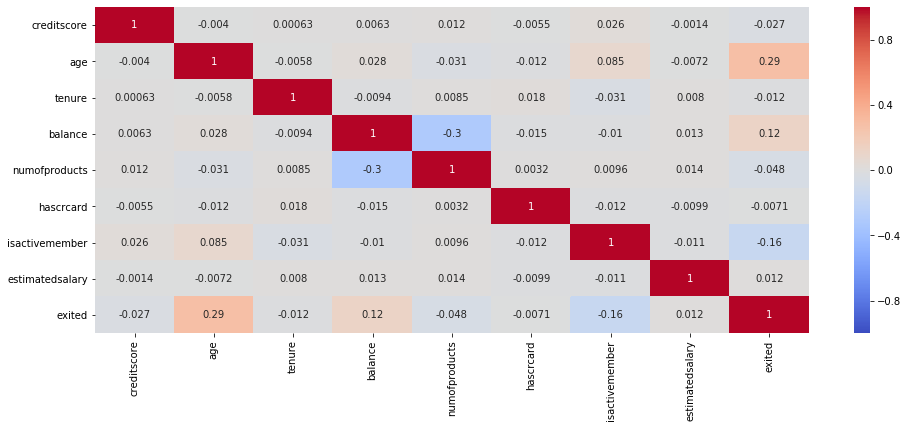

In [13]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(method='pearson'), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.show()

**Вывод**

Значимой корреляции между признаками не обнаружено.

### One-Hot Encoding

In [14]:
df['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

In [15]:
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [16]:
df_ohe_geography = pd.get_dummies(df['geography'], drop_first=False)
df_ohe_gender = pd.get_dummies(df['gender'], drop_first=False)

df_ohe = pd.concat([df, df_ohe_geography, df_ohe_gender], axis=1)
df_ohe.drop(['geography', 'gender'], axis=1, inplace=True)
df_ohe.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,France,Germany,Spain,Female,Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [17]:
df_ohe.columns = df_ohe.columns.str.lower()
df_ohe.columns

Index(['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited', 'france', 'germany',
       'spain', 'female', 'male'],
      dtype='object')

**Вывод**

С помощью One-Hot Encoding преобразованы столбцы geography и gender.

### Разбиение данных на выборки

In [18]:
target = df_ohe['exited']
features = df_ohe.drop(['exited'] , axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(\
                                            features, target, test_size=0.2, random_state=12345, stratify=target)
features_train, features_test, target_train, target_test = train_test_split(\
                                            features_train, target_train, test_size=0.25, random_state=12345)

print('Размер обучающей выборки: ', features_train.shape, ', ', target_train.shape[0], sep = '')
print('Размер валидационной выборки: ', features_valid.shape, ', ', target_valid.shape[0], sep = '')
print('Размер тестовой выборки: ',features_test.shape, ', ', target_test.shape[0], sep = '')

Размер обучающей выборки: (6000, 13), 6000
Размер валидационной выборки: (2000, 13), 2000
Размер тестовой выборки: (2000, 13), 2000


**Вывод**

Данные разбиты на features и target, после чего поделены на обучающую, валидационную и тестовую выборки в соотношении 3:1:1.

### Масштабирование признаков

In [19]:
numeric = ['creditscore', 'age', 'balance', 'numofproducts', 'estimatedsalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
pd.options.mode.chained_assignment = None

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [20]:
features_train.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,france,germany,spain,female,male
8201,0.700234,0.966950,10.0,0.092397,-0.912623,0,1,-1.547205,0,0,1,1,0
9939,0.444023,1.731917,9.0,-1.223611,0.792152,1,1,0.603359,0,0,1,1,0
4823,1.397129,-0.658605,6.0,0.607001,-0.912623,1,0,-1.466752,0,0,1,1,0
7814,-0.027406,-0.562984,3.0,1.471017,0.792152,0,0,-0.178861,0,1,0,1,0
2046,-1.328959,-0.467363,8.0,0.695025,0.792152,1,1,-1.733990,0,1,0,0,1


**Вывод**

Количественные признаки преобразованы в выборках.

## Исследование задачи

**Случайный лес**

In [21]:
best_model_RandomForestClassifier = None
best_result = 0
for est in range(10, 51, 5):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model_RandomForestClassifier = model
            best_result = result

print("F1 на модели случайного леса:", best_result)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-sco

F1 на модели случайного леса: 0.548076923076923


In [22]:
print('Параметры лучшей модели случайного леса:')
pprint(best_model_RandomForestClassifier.get_params())

Параметры лучшей модели случайного леса:
{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12345,
 'verbose': 0,
 'warm_start': False}


**Логистическая регрессия**

In [23]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
result = f1_score(target_valid, predicted_valid)

print("F1 на модели логистической регрессии:", result)
print("Матрица ошибок:")
print(confusion_matrix(target_valid, predicted_valid))

F1 на модели логистической регрессии: 0.29158878504672897
Матрица ошибок:
[[1543   50]
 [ 329   78]]


**Частота признаков**

   exited
0  0.7963
1  0.2037


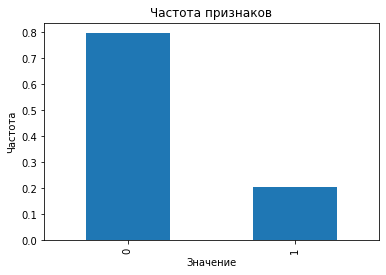

In [24]:
class_frequency = df['exited'].value_counts(normalize=True)
print(class_frequency.to_frame())

class_frequency.plot(kind='bar')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Частота признаков')
plt.show()

**Вывод**

F1 на модели случайного леса: 0.548076923076923.

F1 на модели логистической регрессии: 0.29158878504672897.

Наблюдается дисбаланс классов. Отрицательный класс встречается примерно в 4 раза чаще, чем положительный.

## Борьба с дисбалансом

### Увеличение выборки

In [25]:
def upsample(features, target, repeat):
    
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled= shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled 

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

(9618, 13)
(9618,)


In [26]:
model = RandomForestClassifier(random_state=12345, n_estimators=45, max_depth=10)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
result = f1_score(target_valid, predicted_valid)

print("F1 на модели случайного леса:", result)
print("Матрица ошибок:")
print(confusion_matrix(target_valid, predicted_valid))

F1 на модели случайного леса: 0.6225769669327252
Матрица ошибок:
[[1396  197]
 [ 134  273]]


In [27]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
result = f1_score(target_valid, predicted_valid)

print("F1 на модели логистической регрессии:", result)
print("Матрица ошибок:")
print(confusion_matrix(target_valid, predicted_valid))

F1 на модели логистической регрессии: 0.5055131467345207
Матрица ошибок:
[[1119  474]
 [ 109  298]]


**Вывод**

Положительный класс увеличен в 4 раза.

После увеличения выборки F1 на модели случайного леса составляет 0.6225769669327252.

F1 на модели логистической регрессии: 0.5055131467345207.

### Уменьшение выборки

In [28]:
def downsample(features, target, fraction):
    
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

print(features_downsampled.shape)
print(target_downsampled.shape)

(1685, 13)
(1685,)


In [29]:
model = RandomForestClassifier(random_state=12345, n_estimators=45, max_depth=10)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
result = f1_score(target_valid, predicted_valid)

print("F1 на модели случайного леса:", result)
print("Матрица ошибок:")
print(confusion_matrix(target_valid, predicted_valid))

F1 на модели случайного леса: 0.45787545787545786
Матрица ошибок:
[[737 856]
 [ 32 375]]


In [30]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
result = f1_score(target_valid, predicted_valid)

print("F1 на модели логистической регрессии:", result)
print("Матрица ошибок:")
print(confusion_matrix(target_valid, predicted_valid))

F1 на модели логистической регрессии: 0.416210295728368
Матрица ошибок:
[[ 554 1039]
 [  27  380]]


**Вывод**

Отрицательный класс уменьшен до 1685 объектов.

F1 на модели случайного леса: 0.45787545787545786.

F1 на модели логистической регрессии: 0.416210295728368.

Увеличение выборки показывает лучший результат метрики.

### Порог классификации

In [31]:
def plot_precision_recall_curve(target_valid, probabilities_one_valid):
    
    for threshold in np.arange(0, 0.4, 0.02):
        predicted_valid = probabilities_one_valid > threshold
        precision = precision_score(target_valid, predicted_valid)
        recall = recall_score(target_valid, predicted_valid)
        print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(threshold, precision, recall))

    precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_one_valid)
    
    plt.figure(figsize=(10, 5))
    plt.step(recall, precision, where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.00, 1.00])
    plt.xlim([0.00, 1.00])
    plt.grid()
    plt.title('Кривая Precision-Recall')
    plt.show()

**Случайный лес**

Порог = 0.00 | Точность = 0.203, Полнота = 1.000
Порог = 0.02 | Точность = 0.210, Полнота = 0.995
Порог = 0.04 | Точность = 0.232, Полнота = 0.985
Порог = 0.06 | Точность = 0.260, Полнота = 0.971
Порог = 0.08 | Точность = 0.286, Полнота = 0.946
Порог = 0.10 | Точность = 0.322, Полнота = 0.929
Порог = 0.12 | Точность = 0.356, Полнота = 0.894
Порог = 0.14 | Точность = 0.392, Полнота = 0.867
Порог = 0.16 | Точность = 0.426, Полнота = 0.818
Порог = 0.18 | Точность = 0.463, Полнота = 0.794
Порог = 0.20 | Точность = 0.491, Полнота = 0.764
Порог = 0.22 | Точность = 0.523, Полнота = 0.732
Порог = 0.24 | Точность = 0.552, Полнота = 0.710
Порог = 0.26 | Точность = 0.588, Полнота = 0.676
Порог = 0.28 | Точность = 0.610, Полнота = 0.649
Порог = 0.30 | Точность = 0.639, Полнота = 0.639
Порог = 0.32 | Точность = 0.651, Полнота = 0.609
Порог = 0.34 | Точность = 0.672, Полнота = 0.580
Порог = 0.36 | Точность = 0.693, Полнота = 0.560
Порог = 0.38 | Точность = 0.713, Полнота = 0.538


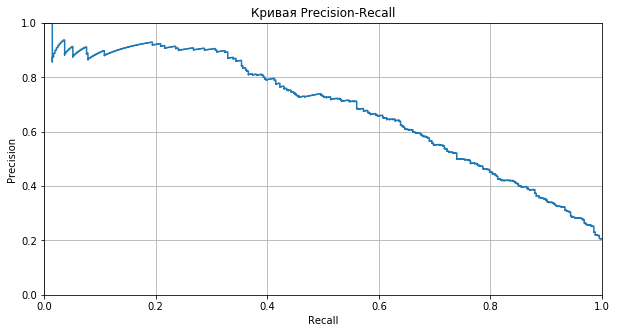

In [32]:
model = RandomForestClassifier(random_state=12345, n_estimators=45, max_depth=10)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

plot_precision_recall_curve(target_valid, probabilities_one_valid)

**Логистическая регрессия**

Порог = 0.00 | Точность = 0.203, Полнота = 1.000
Порог = 0.02 | Точность = 0.204, Полнота = 0.998
Порог = 0.04 | Точность = 0.216, Полнота = 0.993
Порог = 0.06 | Точность = 0.233, Полнота = 0.971
Порог = 0.08 | Точность = 0.256, Полнота = 0.948
Порог = 0.10 | Точность = 0.274, Полнота = 0.914
Порог = 0.12 | Точность = 0.291, Полнота = 0.880
Порог = 0.14 | Точность = 0.308, Полнота = 0.828
Порог = 0.16 | Точность = 0.328, Полнота = 0.796
Порог = 0.18 | Точность = 0.350, Полнота = 0.767
Порог = 0.20 | Точность = 0.376, Полнота = 0.727
Порог = 0.22 | Точность = 0.393, Полнота = 0.688
Порог = 0.24 | Точность = 0.423, Полнота = 0.654
Порог = 0.26 | Точность = 0.445, Полнота = 0.609
Порог = 0.28 | Точность = 0.468, Полнота = 0.563
Порог = 0.30 | Точность = 0.487, Полнота = 0.511
Порог = 0.32 | Точность = 0.506, Полнота = 0.479
Порог = 0.34 | Точность = 0.538, Полнота = 0.447
Порог = 0.36 | Точность = 0.535, Полнота = 0.391
Порог = 0.38 | Точность = 0.545, Полнота = 0.359


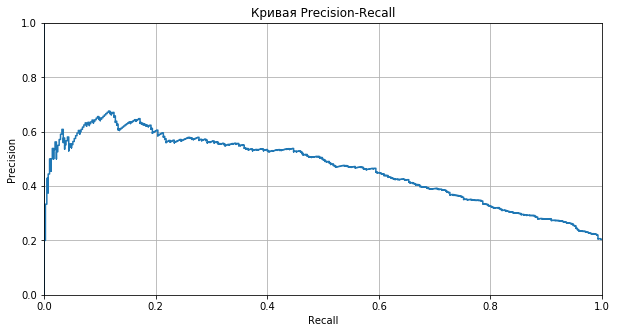

In [33]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

plot_precision_recall_curve(target_valid, probabilities_one_valid)

**Вывод**

Для модели случайного леса лучшее пороговое значение около 0.1.

Для модели логистической регрессии лучшее пороговое значение около 0.2.

###  Обучение модели на train+valid выборке

In [34]:
features_frames = [features_train, features_valid]
two_features = pd.concat(features_frames)

target_frames = [target_train, target_valid]
two_target = pd.concat(target_frames)

print('Размер объединенной train+valid выборки:', two_features.shape, ',', two_target.shape[0])

Размер объединенной train+valid выборки: (8000, 13) , 8000


**Случайный лес**

In [35]:
model = RandomForestClassifier(random_state=12345, n_estimators=45, max_depth=10)
model.fit(two_features, two_target)
predicted_two = model.predict(features_test)
result = f1_score(target_test, predicted_two)

print("F1 на модели случайного леса:", result)

F1 на модели случайного леса: 0.5391849529780564


**Логистическая регрессия**

In [36]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(two_features, two_target)
predicted_two = model.predict(features_test)
result = f1_score(target_test, predicted_two)

print("F1 на модели логистической регрессии:", result)

F1 на модели логистической регрессии: 0.3215547703180212


**Вывод**

После объединения выборок F1 метрика на обоих моделях упала. Тестирование будет проводится на моделях без объединения.

### Подбор гиперпараметров

In [37]:
def plot_auc_roc(target_valid, probabilities_one_valid):

    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print('auc_roc', auc_roc)

    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC={0:0.5f}'.format(roc_auc_score(target_valid, probabilities_one_valid)))
    plt.show()

**Случайный лес**

F1 на модели случайного леса: 0.6326530612244897
auc_roc 0.856546839597687


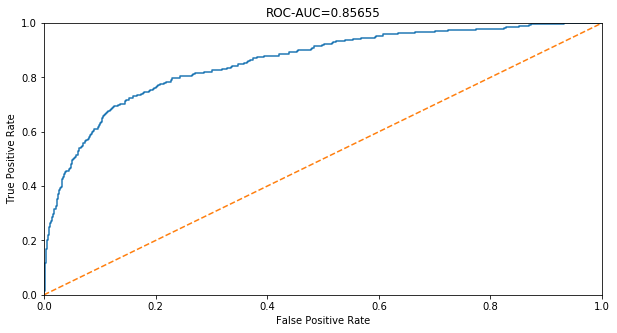

In [38]:
model_rf = None
best_result = 0
for est in range(10, 31, 3):
    for depth in range (1, 15):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            model_rf = model
            best_result = result

print("F1 на модели случайного леса:", best_result)

probabilities_one_valid = model_rf.predict_proba(features_valid)[:, 1]
plot_auc_roc(target_valid, probabilities_one_valid)

In [39]:
print('Параметры лучшей модели случайного леса на тестовой выборке:')
pprint(model_rf.get_params())

Параметры лучшей модели случайного леса на тестовой выборке:
{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 28,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12345,
 'verbose': 0,
 'warm_start': False}


**Логистическая регрессия**

F1 на модели логистической регрессии: 0.5055131467345207
auc_roc 0.7814301204131713


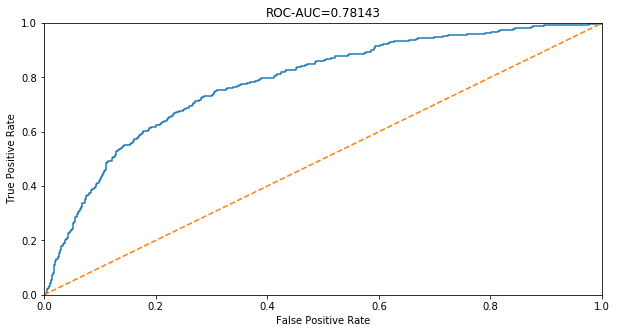

In [40]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_lr.fit(features_upsampled, target_upsampled)
predicted_valid = model_lr.predict(features_valid)
result = f1_score(target_valid, predicted_valid)

print("F1 на модели логистической регрессии:", result)

probabilities_one_valid = model_lr.predict_proba(features_valid)[:, 1]
plot_auc_roc(target_valid, probabilities_one_valid)

**Вывод**

F1 на валидационной выборке финальной модели случайного леса: 0.6326530612244897. ROC-AUC 0.856546839597687.

F1 на валидационной выборке финальной модели логистической регрессии: 0.5055131467345207. ROC-AUC 0.7814301204131713.

В обоих случаях roc_auc больше 0,5. Это значит, что обе модели лучше, чем случайная.

## Тестирование модели

**Случайный лес**

In [41]:
predicted_test = model_rf.predict(features_test)
model_rf_f1_score = f1_score(target_test, predicted_test)

print("F1 на модели случайного леса на тестовой выборке:", model_rf_f1_score)

F1 на модели случайного леса на тестовой выборке: 0.6186252771618624


**Логистическая регрессия**

In [42]:
predicted_test = model_lr.predict(features_test)
model_lr_f1_score = f1_score(target_test, predicted_test)

print("F1 на модели логистической регрессии на тестовой выборке:", model_lr_f1_score)

F1 на модели логистической регрессии на тестовой выборке: 0.4970111016225449


**Вывод**

На тестовой выборке F1 на модели случайного леса: 0.6186252771618624.

На тестовой выборке F1 на модели логистической регрессии: 0.4970111016225449.

## Общий вывод

In [43]:
model = pd.DataFrame({
    'Model': ['RandomForestClassifier', 'LogisticRegression'], 
    'F1 valid': [best_result, result], 
    'F1 test': [model_rf_f1_score, model_lr_f1_score],
})
model

,Model,F1 valid,F1 test
0,RandomForestClassifier,0.632653,0.618625
1,LogisticRegression,0.505513,0.497011


Необходимый уровень F1 метрики достигнут на модели RandomForestClassifier.